In [6]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import os
import pickle
import dask.dataframe as dd
import seaborn as sns
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import subprocess
import random
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from scipy.stats import spearmanr
import scipy.stats as stats
from scipy.stats import pearsonr
import numpy as np
import allel

In [16]:
final_ter = pd.read_csv('../final_gen.csv')['sample_name']

In [34]:
final_ter_siteplot = final_ter.str.split('_').str[0] + '_' + final_ter.str.split('_').str[2]

In [2]:
for split_number in range(2):
    file_pred_ef = f'/carnegie/nobackup/scratch/tbellagio/gea_grene-net/leave_1_out/split_number_{split_number}/delta_p/pred_ecotype_freq.csv' 

IndentationError: expected an indented block (956788724.py, line 1)

In [7]:
vcf_file = '/carnegie/nobackup/scratch/xwu/grenet/hapFIRE_updatedVCF/greneNet_final_v1.1_LDpruned.recode.vcf'
vcf = allel.read_vcf(vcf_file)

In [8]:
samples = vcf['samples']
samples = samples.astype(int)

In [9]:
founder_ef = pd.read_csv('/carnegie/nobackup/scratch/xwu/grenet/merged_frequency/ecotype_founder_frequency.txt', header=None)
founder_ef.index = samples
founder_ef.index = founder_ef.index.astype(int)
founder_ef_series = founder_ef.squeeze()

In [140]:
path_ecotypes_freq = '/carnegie/nobackup/scratch/xwu/grenet/merged_frequency/merged_ecotype_frequency.txt'
real_ef = pd.read_csv(path_ecotypes_freq,sep='\t', usecols=final_ter)
real_ef.columns = pd.Series(real_ef.columns).str.split('_').str[0] + '_' + pd.Series(real_ef.columns).str.split('_').str[2]
real_ef.index = samples

In [142]:
real_ef.to_csv('chat_gpt_ecotype_freq.csv')

In [ ]:
file_pred_ef = f'/carnegie/nobackup/scratch/tbellagio/gea_grene-net/leave_1_out/split_number_{1}/delta_p/pred_ecotype_freq.csv' 
pred_ecotypes_frequency = pd.read_csv(file_pred_ef)
pred_ecotypes_frequency = pred_ecotypes_frequency.set_index('Unnamed: 0')


In [147]:
pred_ecotypes_frequency

,2_1_8,2_1_9,2_1_11,2_1_12,2_2_5,2_2_6,2_2_7,11_1_4,11_1_8,11_1_9,...,48_3_1,48_3_2,48_3_3,48_3_4,48_3_6,48_3_8,48_3_9,48_3_10,48_3_11,48_3_12
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
10002,1.168424e-03,1.168424e-03,1.168424e-03,1.168424e-03,1.168424e-03,1.168424e-03,1.168424e-03,0.009035,0.009035,0.009035,...,1.409389e-02,1.409389e-02,1.409389e-02,1.409389e-02,1.409389e-02,1.409389e-02,1.409389e-02,1.409389e-02,1.409389e-02,1.409389e-02
10006,1.167022e-02,1.167022e-02,1.167022e-02,1.167022e-02,1.167022e-02,1.167022e-02,1.167022e-02,0.002376,0.002376,0.002376,...,2.618535e-07,2.618535e-07,2.618535e-07,2.618535e-07,2.618535e-07,2.618535e-07,2.618535e-07,2.618535e-07,2.618535e-07,2.618535e-07
10011,5.803583e-03,5.803583e-03,5.803583e-03,5.803583e-03,5.803583e-03,5.803583e-03,5.803583e-03,0.003424,0.003424,0.003424,...,2.010594e-03,2.010594e-03,2.010594e-03,2.010594e-03,2.010594e-03,2.010594e-03,2.010594e-03,2.010594e-03,2.010594e-03,2.010594e-03
10013,2.380571e-03,2.380571e-03,2.380571e-03,2.380571e-03,2.380571e-03,2.380571e-03,2.380571e-03,0.003657,0.003657,0.003657,...,6.167828e-08,6.167828e-08,6.167828e-08,6.167828e-08,6.167828e-08,6.167828e-08,6.167828e-08,6.167828e-08,6.167828e-08,6.167828e-08
10014,1.334885e-02,1.334885e-02,1.334885e-02,1.334885e-02,1.334885e-02,1.334885e-02,1.334885e-02,0.002685,0.002685,0.002685,...,1.062651e-07,1.062651e-07,1.062651e-07,1.062651e-07,1.062651e-07,1.062651e-07,1.062651e-07,1.062651e-07,1.062651e-07,1.062651e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100002,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,...,8.934494e-04,8.934494e-04,8.934494e-04,8.934494e-04,8.934494e-04,8.934494e-04,8.934494e-04,8.934494e-04,8.934494e-04,8.934494e-04
6939,4.508848e-03,4.508848e-03,4.508848e-03,4.508848e-03,4.508848e-03,4.508848e-03,4.508848e-03,0.004042,0.004042,0.004042,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
9940,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000914,0.000914,0.000914,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


In [134]:
#ecotypes_m = pd.read_csv('ecotype_terminal_frequencies_wide_raw.csv').drop('Unnamed: 0',axis=1)
#ecotypes_m
#ecotypes_m = ecotypes_m.set_index('site_rep').T
#ecotypes_m.index = ecotypes_m.index.astype(int)
#(ecotypes_m[final_ter_siteplot].sort_index() == ecotypes_x[final_ter_siteplot].sort_index()).all().all()

In [135]:
p1overp0_real = real_ef.div(founder_ef_series, axis=0).sort_index()

In [136]:
deltap_real = real_ef.sub(founder_ef_series, axis=0).sort_index()

In [121]:
spcorrelation_ef = {}

for split_number in range(100):
    #output_file_sp_p1p0 = f'/carnegie/nobackup/scratch/tbellagio/gea_grene-net/leave_1_out/split_number_{split_number}/delta_p/sp_corr_p1overp0.csv' 
    file_pred_ef = f'/carnegie/nobackup/scratch/tbellagio/gea_grene-net/leave_1_out/split_number_{split_number}/delta_p/pred_ecotype_freq.csv' 
    pred_ecotypes_frequency = pd.read_csv(file_pred_ef)
    pred_ecotypes_frequency = pred_ecotypes_frequency.set_index('Unnamed: 0')

    pred_p1overp0 = pred_ecotypes_frequency.div(founder_ef_series, axis=0)
    ## convert the columns of the prediciton into just plot_site because the real values are in those terms 
    test_samples_mod = pd.Series(pred_p1overp0.columns).str.split('_').str[0] + '_' + pd.Series(pred_p1overp0.columns).str.split('_').str[2]
    pred_p1overp0.columns = test_samples_mod

    ## bring the real values 
    real_ef_test = p1overp0_real[test_samples_mod]
    
    #print((real_ef_test.columns == pred_p1overp0.columns).all())
    
    for i in real_ef_test.columns:
        both = pd.concat([real_ef_test[i], pred_p1overp0[i]],axis=1)

        both.columns = ['real', 'pred'] 
        #sns.regplot(both, y = 'pred', x = 'real')
        both = both.sort_values('pred')
        # Get the ranks of the data
        X_ranked = both['real']
        y_ranked = both['pred']
    
        # Compute Spearman's rank correlation
        correlation, _ = spearmanr(X_ranked, y_ranked)
        spcorrelation_ef[i + '_split_' + str(split_number)] = correlation        

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


In [122]:
spcorrelation_ef = pd.DataFrame(list(spcorrelation_ef.items()), columns=['Index', 'Value'])
spcorrelation_ef.columns = ['sample', 'r2'] 

In [123]:
spcorrelation_ef['sample'].str.split('_')

0          [4, 4, split, 0]
1          [4, 1, split, 0]
2          [4, 2, split, 0]
3          [4, 3, split, 0]
4          [4, 5, split, 0]
               ...         
6856     [54, 8, split, 99]
6857     [54, 9, split, 99]
6858    [54, 10, split, 99]
6859    [54, 11, split, 99]
6860    [54, 12, split, 99]
Name: sample, Length: 6861, dtype: object

In [124]:
spcorrelation_ef['site'] = spcorrelation_ef['sample'].str.split('_').str[0]
#spcorrelation_ef['site'] = spcorrelation_ef['sample'].str.split('_').str[]

In [152]:
spcorrelation_ef['split'] = spcorrelation_ef['sample'].str.split('_').str[3]

In [155]:
spcorrelation_ef[spcorrelation_ef['site']=='27'].split.unique()

array(['5', '6', '9', '10', '13', '21', '36', '37', '38', '41', '43',
       '45', '68', '71', '72', '76', '77', '79', '87'], dtype=object)

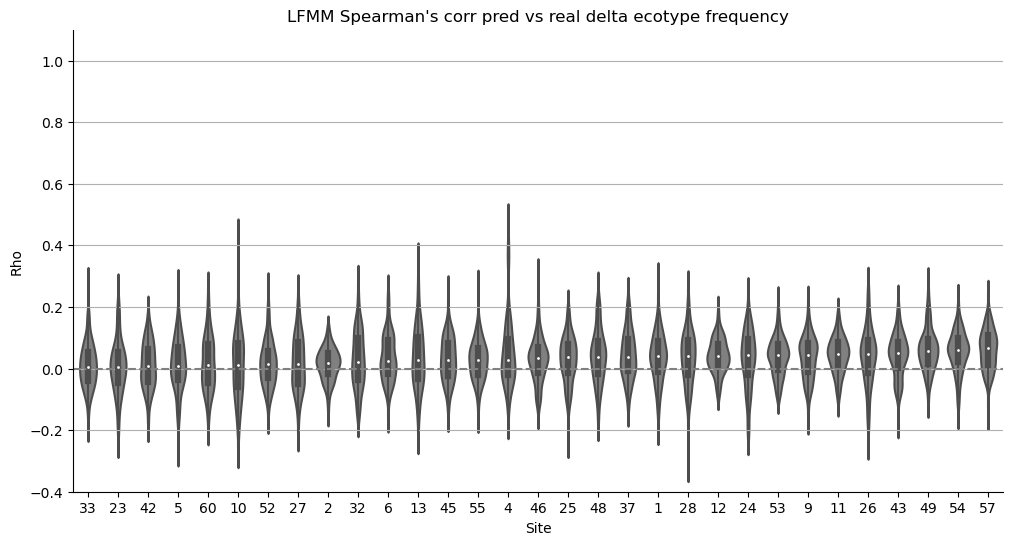

In [126]:
medians = spcorrelation_ef.groupby('site')['r2'].median().sort_values()

# Set the size of the plot
plt.figure(figsize=(12, 6))  # You can adjust the width and height as needed

# Create the plot, ordering by median 'r2'
# Use 'scale' to adjust the width of violins; options are 'area', 'count', or 'width'
sns.violinplot(data=spcorrelation_ef, y='r2', x='site', order=medians.index, color = 'Grey')

# Draw a horizontal line at y=0
plt.axhline(0, color='grey', linestyle='--')  # Color and style are adjustable
plt.ylim(-0.4, 1.1)
plt.grid(axis='y')
# Remove top and right spines
ax = plt.gca()  # Get current axes
ax.spines['top'].set_visible(False)  # Remove the top spine
ax.spines['right'].set_visible(False)

# Optionally, add labels or a title
plt.title('LFMM Spearman\'s corr pred vs real delta ecotype frequency')
plt.xlabel('Site')
plt.ylabel('Rho')
plt.savefig('LFMM_sp.png')
# Show the plot
plt.show()

In [128]:
spcorrelation_ef = {}
for split_number in range(100):
    #output_file_sp_p1p0 = f'/carnegie/nobackup/scratch/tbellagio/gea_grene-net/leave_1_out/split_number_{split_number}/delta_p/sp_corr_p1overp0.csv' 
    file_pred_ef = f'/carnegie/nobackup/scratch/tbellagio/gea_grene-net/leave_1_out/split_number_{split_number}/delta_p/pred_ecotype_freq.csv' 
    pred_ecotypes_frequency = pd.read_csv(file_pred_ef)
    pred_ecotypes_frequency = pred_ecotypes_frequency.set_index('Unnamed: 0')

    pred_deltap = pred_ecotypes_frequency.sub(founder_ef_series, axis=0)
    ## convert the columns of the prediciton into just plot_site because the real values are in those terms 
    test_samples_mod = pd.Series(pred_deltap.columns).str.split('_').str[0] + '_' + pd.Series(pred_deltap.columns).str.split('_').str[2]
    pred_deltap.columns = test_samples_mod

    ## bring the real values 
    real_ef_test = deltap_real[test_samples_mod]
    
    #print((pred_deltap.columns == real_ef_test.columns).all())
    

    for i in real_ef_test.columns:
        both = pd.concat([real_ef_test[i], pred_deltap[i]],axis=1)

        both.columns = ['real', 'pred'] 
        #sns.regplot(both, y = 'pred', x = 'real')
        both = both.sort_values('pred')
        # Get the ranks of the data
        X_ranked = both['real']
        y_ranked = both['pred']
    
        # Compute Spearman's rank correlation
        correlation, _ = spearmanr(X_ranked, y_ranked)
        spcorrelation_ef[i + '_split_' + str(split_number)] = correlation

In [ ]:
spcorrelation_ef = pd.DataFrame(list(spcorrelation_ef.items()), columns=['Index', 'Value'])
spcorrelation_ef.columns = ['sample', 'r2'] 

spcorrelation_ef['site'] = spcorrelation_ef['sample'].str.split('_').str[0]


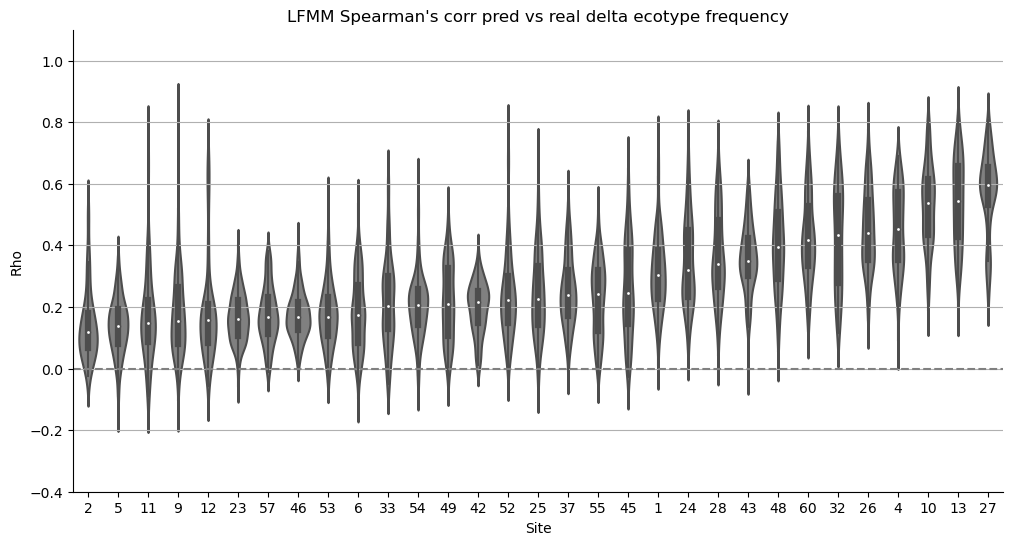

In [131]:
medians = spcorrelation_ef.groupby('site')['r2'].median().sort_values()

# Set the size of the plot
plt.figure(figsize=(12, 6))  # You can adjust the width and height as needed

# Create the plot, ordering by median 'r2'
# Use 'scale' to adjust the width of violins; options are 'area', 'count', or 'width'
sns.violinplot(data=spcorrelation_ef, y='r2', x='site', order=medians.index, color = 'Grey')

# Draw a horizontal line at y=0
plt.axhline(0, color='grey', linestyle='--')  # Color and style are adjustable
plt.ylim(-0.4, 1.1)
plt.grid(axis='y')
# Remove top and right spines
ax = plt.gca()  # Get current axes
ax.spines['top'].set_visible(False)  # Remove the top spine
ax.spines['right'].set_visible(False)

# Optionally, add labels or a title
plt.title('LFMM Spearman\'s corr pred vs real delta ecotype frequency')
plt.xlabel('Site')
plt.ylabel('Rho')
plt.savefig('LFMM_sp.png')
# Show the plot
plt.show()

In [137]:
spcorrelation_ef = {}

for split_number in range(100):
    #output_file_sp_p1p0 = f'/carnegie/nobackup/scratch/tbellagio/gea_grene-net/leave_1_out/split_number_{split_number}/delta_p/sp_corr_p1overp0.csv' 
    file_pred_ef = f'/carnegie/nobackup/scratch/tbellagio/gea_grene-net/leave_1_out/split_number_{split_number}/delta_p/pred_ecotype_freq.csv' 
    pred_ecotypes_frequency = pd.read_csv(file_pred_ef)
    pred_ecotypes_frequency = pred_ecotypes_frequency.set_index('Unnamed: 0')

    ## convert the columns of the prediciton into just plot_site because the real values are in those terms 
    test_samples_mod = pd.Series(pred_ecotypes_frequency.columns).str.split('_').str[0] + '_' + pd.Series(pred_ecotypes_frequency.columns).str.split('_').str[2]
    pred_ecotypes_frequency.columns = test_samples_mod

    ## bring the real values 
    real_ef_test = real_ef[test_samples_mod]
    
    #print((real_ef_test.columns == pred_p1overp0.columns).all())
    
    for i in real_ef_test.columns:
        both = pd.concat([real_ef_test[i], pred_ecotypes_frequency[i]],axis=1)

        both.columns = ['real', 'pred'] 
        #sns.regplot(both, y = 'pred', x = 'real')
        both = both.sort_values('pred')
        # Get the ranks of the data
        X_ranked = both['real']
        y_ranked = both['pred']
    
        # Compute Spearman's rank correlation
        correlation, _ = spearmanr(X_ranked, y_ranked)
        spcorrelation_ef[i + '_split_' + str(split_number)] = correlation      

In [138]:
spcorrelation_ef = pd.DataFrame(list(spcorrelation_ef.items()), columns=['Index', 'Value'])
spcorrelation_ef.columns = ['sample', 'r2'] 

spcorrelation_ef['site'] = spcorrelation_ef['sample'].str.split('_').str[0]

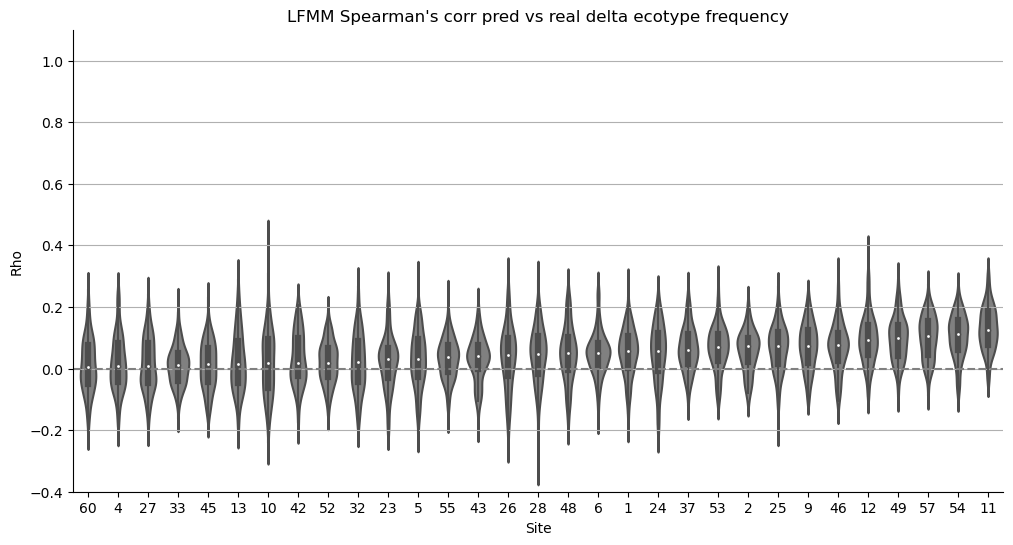

In [139]:
medians = spcorrelation_ef.groupby('site')['r2'].median().sort_values()

# Set the size of the plot
plt.figure(figsize=(12, 6))  # You can adjust the width and height as needed

# Create the plot, ordering by median 'r2'
# Use 'scale' to adjust the width of violins; options are 'area', 'count', or 'width'
sns.violinplot(data=spcorrelation_ef, y='r2', x='site', order=medians.index, color = 'Grey')

# Draw a horizontal line at y=0
plt.axhline(0, color='grey', linestyle='--')  # Color and style are adjustable
plt.ylim(-0.4, 1.1)
plt.grid(axis='y')
# Remove top and right spines
ax = plt.gca()  # Get current axes
ax.spines['top'].set_visible(False)  # Remove the top spine
ax.spines['right'].set_visible(False)

# Optionally, add labels or a title
plt.title('LFMM Spearman\'s corr pred vs real delta ecotype frequency')
plt.xlabel('Site')
plt.ylabel('Rho')
plt.savefig('LFMM_sp.png')
# Show the plot
plt.show()

In [ ]:
split_number = 5 

In [171]:

#output_file_sp_p1p0 = f'/carnegie/nobackup/scratch/tbellagio/gea_grene-net/leave_1_out/split_number_{split_number}/delta_p/sp_corr_p1overp0.csv' 
file_pred_ef = f'/carnegie/nobackup/scratch/tbellagio/gea_grene-net/leave_1_out/split_number_{split_number}/delta_p/pred_ecotype_freq.csv' 
pred_ecotypes_frequency = pd.read_csv(file_pred_ef)
pred_ecotypes_frequency = pred_ecotypes_frequency.set_index('Unnamed: 0')
test_samples_mod = pd.Series(pred_ecotypes_frequency.columns).str.split('_').str[0] + '_' + pd.Series(pred_ecotypes_frequency.columns).str.split('_').str[2]
pred_ecotypes_frequency.columns = test_samples_mod

In [172]:
pred_ecotypes_frequency_site27 = pred_ecotypes_frequency[pred_ecotypes_frequency.columns[pred_ecotypes_frequency.columns.str.startswith('27_')]]

In [173]:
pred_ecotypes_frequency_site27

,27_2,27_3,27_5,27_1,27_4,27_6,27_7,27_8,27_9,27_10,27_11,27_12
Unnamed: 0,,,,,,,,,,,,
10002,3.597140e-08,3.597140e-08,3.597140e-08,3.597140e-08,3.597140e-08,3.597140e-08,3.597140e-08,3.597140e-08,3.597140e-08,3.597140e-08,3.597140e-08,3.597140e-08
10006,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
10011,5.516062e-08,5.516062e-08,5.516062e-08,5.516062e-08,5.516062e-08,5.516062e-08,5.516062e-08,5.516062e-08,5.516062e-08,5.516062e-08,5.516062e-08,5.516062e-08
10013,7.146820e-08,7.146820e-08,7.146820e-08,7.146820e-08,7.146820e-08,7.146820e-08,7.146820e-08,7.146820e-08,7.146820e-08,7.146820e-08,7.146820e-08,7.146820e-08
10014,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...
100002,5.220234e-02,5.220234e-02,5.220234e-02,5.220234e-02,5.220234e-02,5.220234e-02,5.220234e-02,5.220234e-02,5.220234e-02,5.220234e-02,5.220234e-02,5.220234e-02
6939,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
9940,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


In [174]:
founder_ef_series

10002     0.006590
10006     0.003743
10011     0.003077
10013     0.004072
10014     0.004202
            ...   
100002    0.001702
6939      0.003251
9940      0.001544
9977      0.002353
9992      0.002553
Name: 0, Length: 231, dtype: float64

In [175]:
pred_deltap_site27 = pred_ecotypes_frequency_site27.sub(founder_ef_series, axis=0)

In [176]:
pred_p1overp0_site27 = pred_ecotypes_frequency_site27.div(founder_ef_series, axis=0)

In [181]:
deltap_real_site27 = deltap_real[deltap_real.columns[deltap_real.columns.str.startswith('27_')]]

In [182]:
p1overp0_real_site27 = p1overp0_real[p1overp0_real.columns[p1overp0_real.columns.str.startswith('27_')]]

In [ ]:
from scipy.stats import spearmanr

# Drop the identifier column for correlation computation
data_pred_dropped = data_pred.drop(columns=['Unnamed: 0'])
data_real_dropped = data_real.drop(columns=['Unnamed: 0'])

# Calculate Spearman correlation for each pair of columns
correlations = {}
for column in data_pred_dropped.columns:
    rho, p_value = spearmanr(data_pred_dropped[column], data_real_dropped[column])
    correlations[column] = {'rho': rho, 'p-value': p_value}

correlations

In [195]:
deltap_real_site27

,27_2,27_3,27_5,27_1,27_4,27_6,27_7,27_8,27_9,27_10,27_11,27_12
159,-0.004631,-0.004728,-0.004819,-0.004867,-0.004727,-0.004695,-0.004762,-0.004687,-0.004752,-0.004665,-0.004807,-0.004715
265,-0.003198,-0.003075,-0.002810,-0.003159,-0.003152,-0.003220,-0.003147,-0.003148,-0.003100,-0.003130,-0.003192,-0.003135
763,-0.003772,-0.004042,-0.003989,-0.004146,-0.004146,-0.004053,-0.004135,-0.004093,-0.004146,-0.004146,-0.004018,-0.004146
765,-0.002454,-0.003758,-0.003716,-0.003758,-0.003758,-0.003758,-0.003758,-0.003727,-0.003758,-0.003758,-0.003354,-0.003758
766,-0.002203,-0.004198,-0.004198,-0.004070,-0.004198,-0.004198,-0.004198,-0.004198,-0.004198,-0.004198,-0.003338,-0.004198
...,...,...,...,...,...,...,...,...,...,...,...,...
10011,-0.002666,-0.003015,-0.003077,-0.002897,-0.003077,-0.003077,-0.002898,-0.003077,-0.003077,-0.003077,-0.002789,-0.003077
10013,-0.004072,-0.004072,-0.004021,-0.004072,-0.004072,-0.004072,-0.004072,-0.003986,-0.004072,-0.004072,-0.004072,-0.004072
10014,-0.004202,-0.004202,-0.004202,-0.004202,-0.004202,-0.004081,-0.004176,-0.004137,-0.004095,-0.004202,-0.004202,-0.004124
100001,-0.001307,-0.001459,-0.001221,-0.001710,-0.001448,-0.001455,-0.001530,-0.001501,-0.001321,-0.001478,-0.001386,-0.001408


In [196]:
pred_deltap_site27

,27_2,27_3,27_5,27_1,27_4,27_6,27_7,27_8,27_9,27_10,27_11,27_12
Unnamed: 0,,,,,,,,,,,,
10002,-0.006590,-0.006590,-0.006590,-0.006590,-0.006590,-0.006590,-0.006590,-0.006590,-0.006590,-0.006590,-0.006590,-0.006590
10006,-0.003743,-0.003743,-0.003743,-0.003743,-0.003743,-0.003743,-0.003743,-0.003743,-0.003743,-0.003743,-0.003743,-0.003743
10011,-0.003077,-0.003077,-0.003077,-0.003077,-0.003077,-0.003077,-0.003077,-0.003077,-0.003077,-0.003077,-0.003077,-0.003077
10013,-0.004072,-0.004072,-0.004072,-0.004072,-0.004072,-0.004072,-0.004072,-0.004072,-0.004072,-0.004072,-0.004072,-0.004072
10014,-0.004202,-0.004202,-0.004202,-0.004202,-0.004202,-0.004202,-0.004202,-0.004202,-0.004202,-0.004202,-0.004202,-0.004202
...,...,...,...,...,...,...,...,...,...,...,...,...
100002,0.050501,0.050501,0.050501,0.050501,0.050501,0.050501,0.050501,0.050501,0.050501,0.050501,0.050501,0.050501
6939,-0.003251,-0.003251,-0.003251,-0.003251,-0.003251,-0.003251,-0.003251,-0.003251,-0.003251,-0.003251,-0.003251,-0.003251
9940,-0.001544,-0.001544,-0.001544,-0.001544,-0.001544,-0.001544,-0.001544,-0.001544,-0.001544,-0.001544,-0.001544,-0.001544


In [193]:
deltap_real_site27.to_csv('site27_real.csv')

In [194]:
pred_deltap_site27.to_csv('site27_pred.csv')

0.6769095971494773


<Axes: xlabel='real', ylabel='pred'>

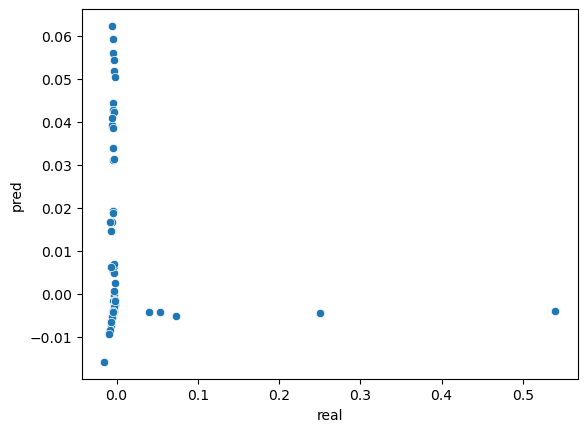

In [209]:
correlation, _ = spearmanr(both['real'], both['pred'])
print(correlation)
sns.scatterplot(data = both , x = 'real', y = 'pred')

0.62017237002581


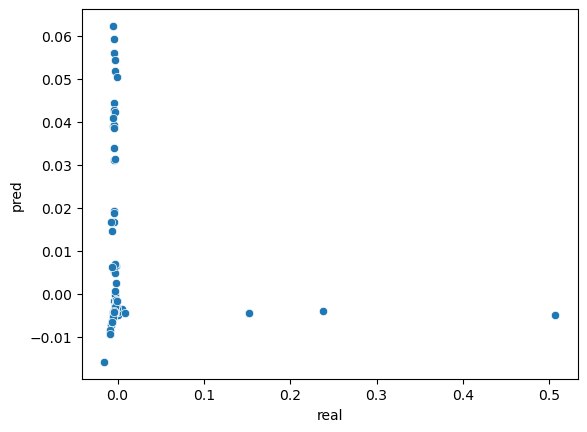

0.6978591872894722


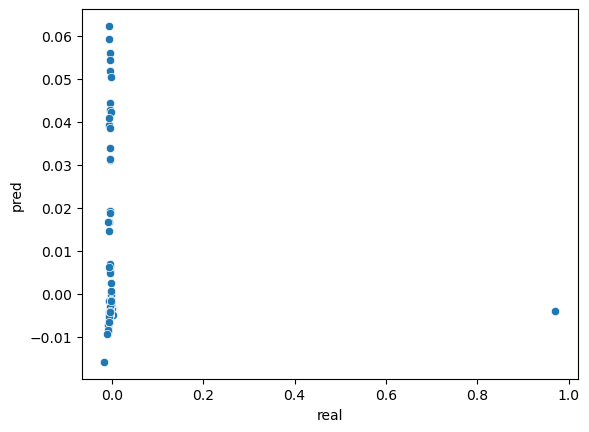

0.6779600459510505


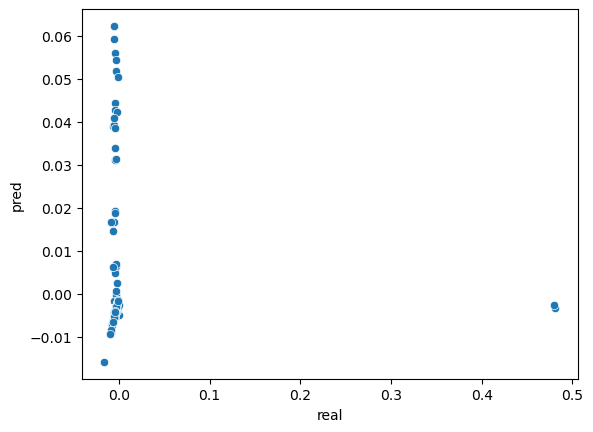

0.7129297476902381


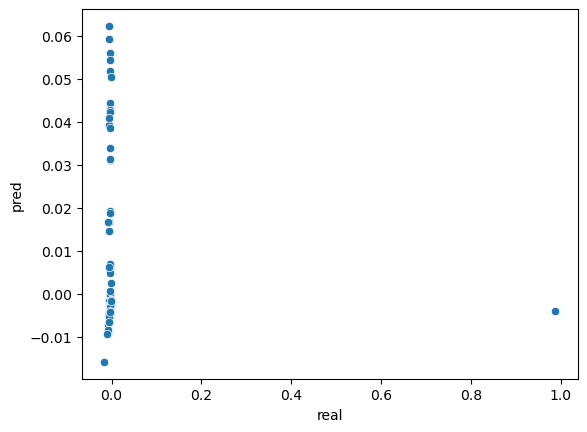

0.6786580735606224


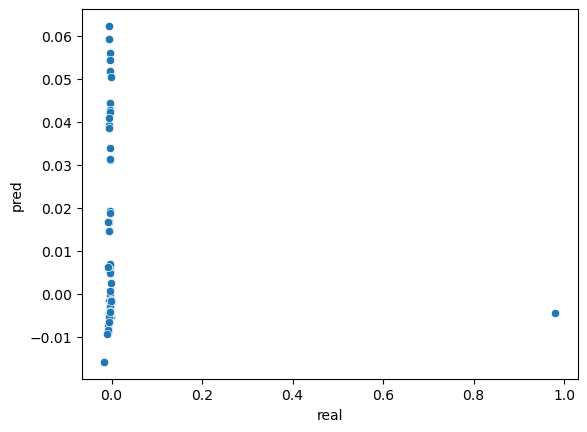

0.6995541190443739


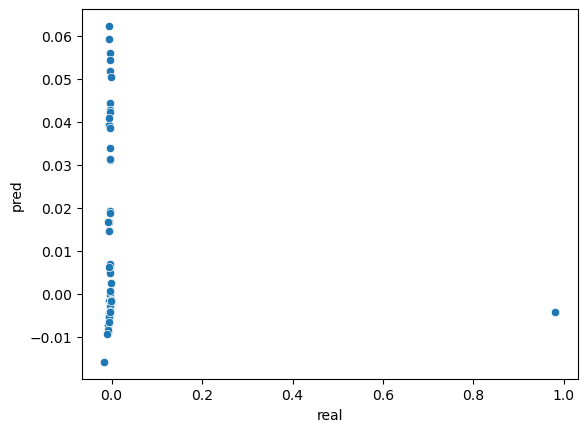

0.6671524628479294


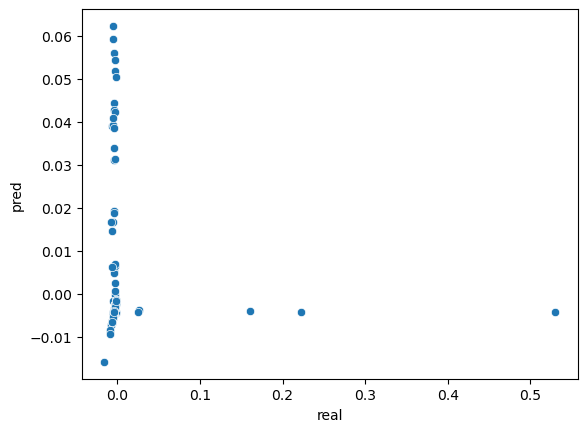

0.6426090467613089


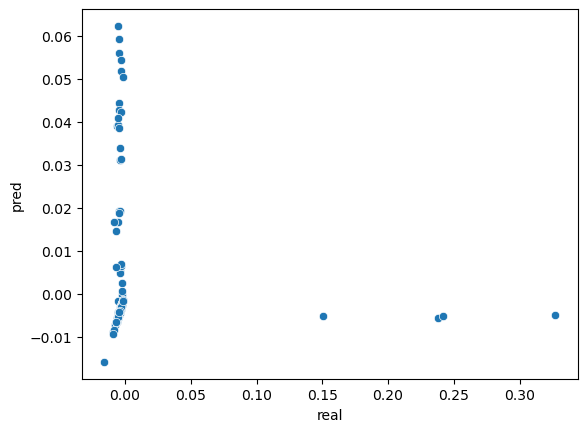

0.7162104012928602


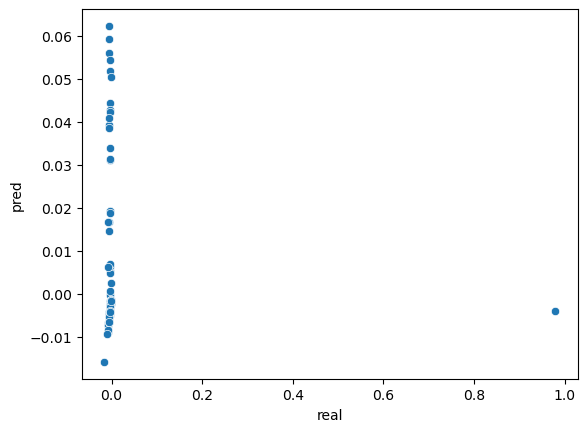

0.691701720171198


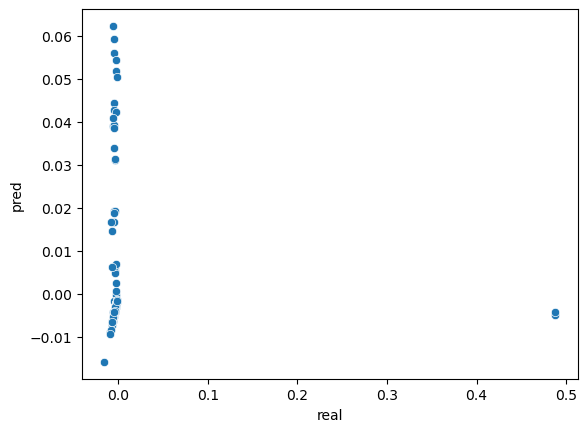

0.6706886816332094


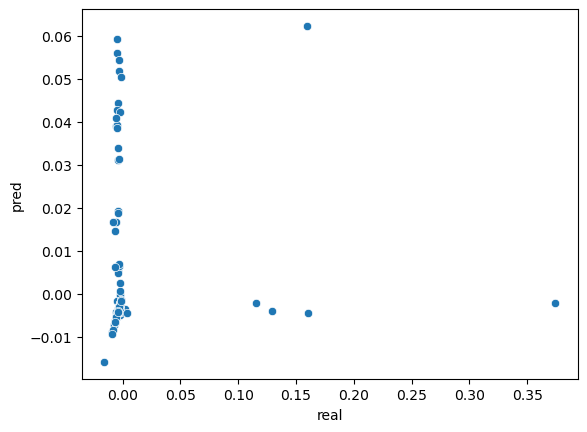

0.6769095971494773


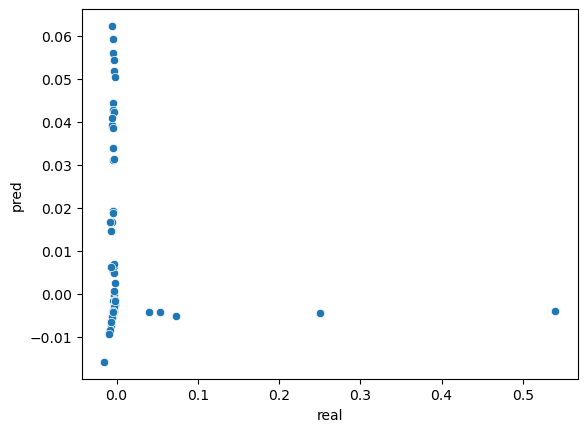

In [207]:
for i in deltap_real_site27.columns:
    both = pd.concat([deltap_real_site27[i], pred_deltap_site27[i]],axis=1)
    both.columns = ['real', 'pred']
    correlation, _ = spearmanr(both['real'], both['pred'])
    print(correlation)
    sns.scatterplot(data = both , x = 'real', y = 'pred')
    plt.show()

0.6769095971494773


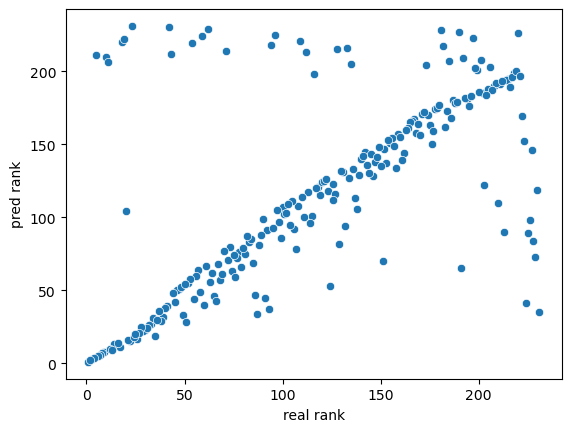

0.6769095971494773


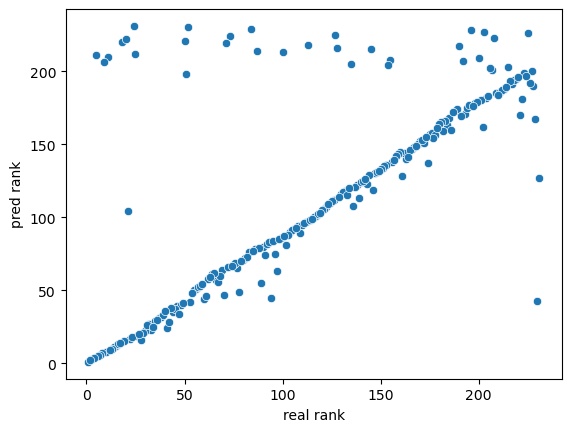

0.6769095971494773


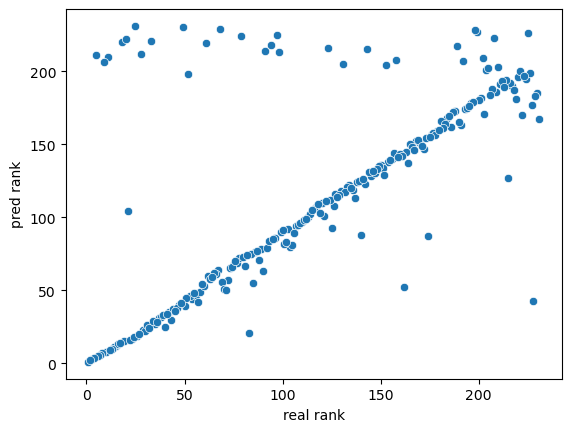

0.6769095971494773


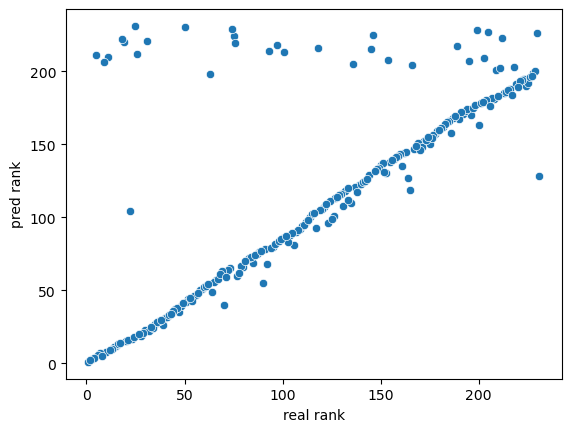

0.6769095971494773


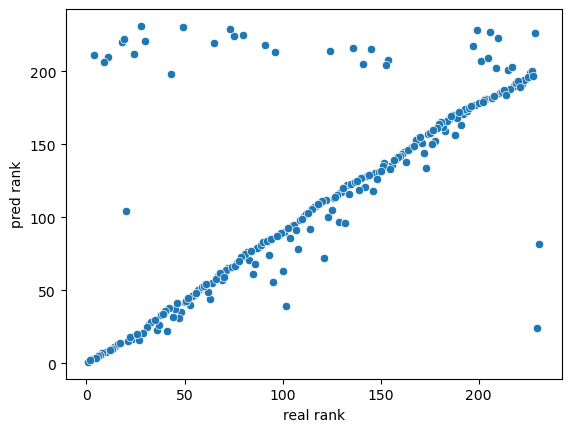

0.6769095971494773


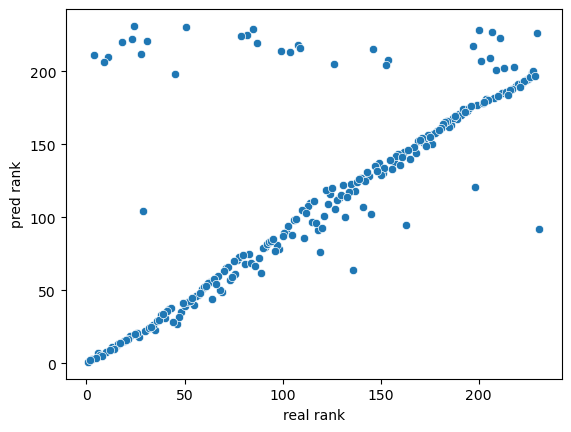

0.6769095971494773


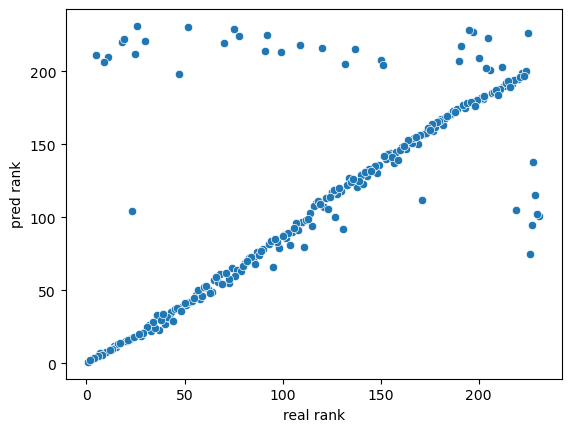

0.6769095971494773


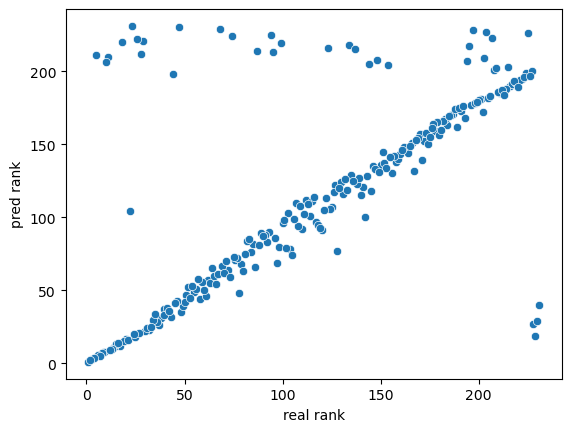

0.6769095971494773


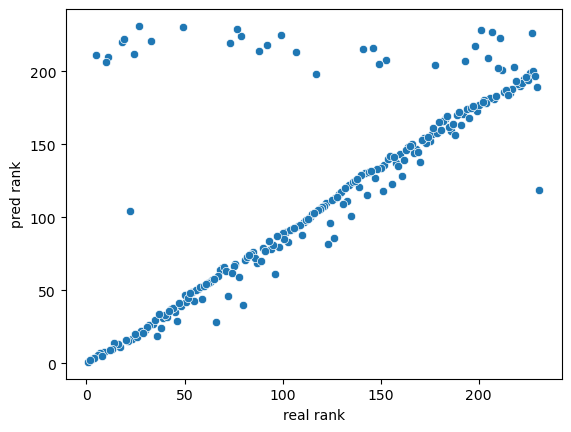

0.6769095971494773


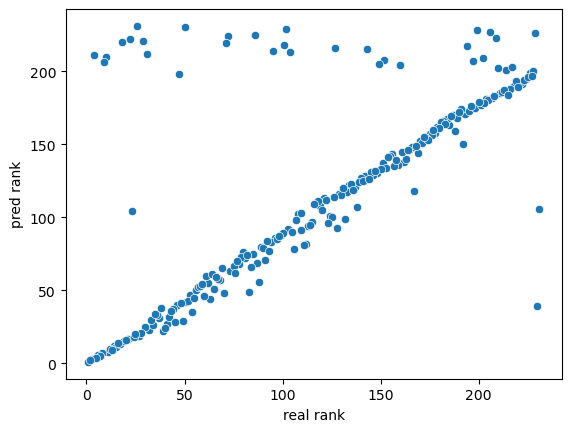

0.6769095971494773


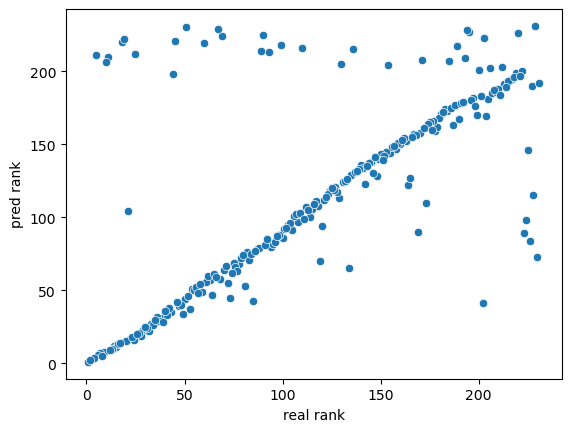

0.6769095971494773


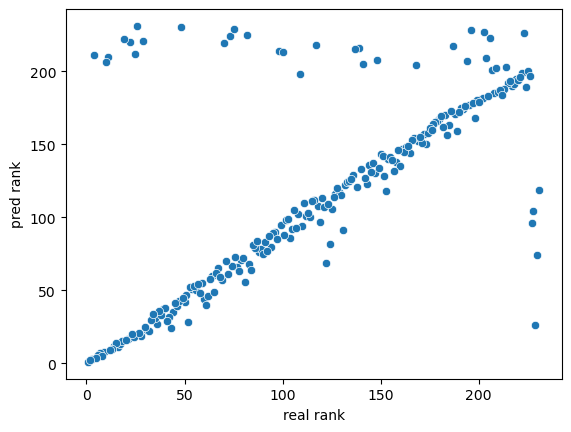

In [211]:
for i in deltap_real_site27.columns:
    both = pd.concat([deltap_real_site27[i], pred_deltap_site27[i]],axis=1)
    both.columns = ['real', 'pred']
    both['real'] =  both['real'].rank()
    both['pred'] = both['pred'].rank()
    #correlation, _ = spearmanr(both['real'], both['pred'])
    print(correlation)
    sns.scatterplot(data = both , x = 'real', y = 'pred')
    plt.xlabel('real rank')
    plt.ylabel('pred rank')
    plt.show()

In [200]:
deltap_real_site27

,27_2,27_3,27_5,27_1,27_4,27_6,27_7,27_8,27_9,27_10,27_11,27_12
159,-0.004631,-0.004728,-0.004819,-0.004867,-0.004727,-0.004695,-0.004762,-0.004687,-0.004752,-0.004665,-0.004807,-0.004715
265,-0.003198,-0.003075,-0.002810,-0.003159,-0.003152,-0.003220,-0.003147,-0.003148,-0.003100,-0.003130,-0.003192,-0.003135
763,-0.003772,-0.004042,-0.003989,-0.004146,-0.004146,-0.004053,-0.004135,-0.004093,-0.004146,-0.004146,-0.004018,-0.004146
765,-0.002454,-0.003758,-0.003716,-0.003758,-0.003758,-0.003758,-0.003758,-0.003727,-0.003758,-0.003758,-0.003354,-0.003758
766,-0.002203,-0.004198,-0.004198,-0.004070,-0.004198,-0.004198,-0.004198,-0.004198,-0.004198,-0.004198,-0.003338,-0.004198
...,...,...,...,...,...,...,...,...,...,...,...,...
10011,-0.002666,-0.003015,-0.003077,-0.002897,-0.003077,-0.003077,-0.002898,-0.003077,-0.003077,-0.003077,-0.002789,-0.003077
10013,-0.004072,-0.004072,-0.004021,-0.004072,-0.004072,-0.004072,-0.004072,-0.003986,-0.004072,-0.004072,-0.004072,-0.004072
10014,-0.004202,-0.004202,-0.004202,-0.004202,-0.004202,-0.004081,-0.004176,-0.004137,-0.004095,-0.004202,-0.004202,-0.004124
100001,-0.001307,-0.001459,-0.001221,-0.001710,-0.001448,-0.001455,-0.001530,-0.001501,-0.001321,-0.001478,-0.001386,-0.001408


In [201]:
pd.concat([deltap_real_site27[i], pred_deltap_site27[i]],axis=1)

,27_12,27_12
159,-0.004715,-0.004867
265,-0.003135,-0.003220
763,-0.004146,-0.004146
765,-0.003758,0.006526
766,-0.004198,-0.004198
...,...,...
10011,-0.003077,-0.003077
10013,-0.004072,-0.004072
10014,-0.004124,-0.004202
100001,-0.001408,-0.001710


In [202]:
deltap_real_site27[i]

159      -0.004715
265      -0.003135
763      -0.004146
765      -0.003758
766      -0.004198
            ...   
10011    -0.003077
10013    -0.004072
10014    -0.004124
100001   -0.001408
100002   -0.001569
Name: 27_12, Length: 231, dtype: float64

In [204]:
pred_deltap_site27[i].sort_index()

Unnamed: 0
159      -0.004867
265      -0.003220
763      -0.004146
765       0.006526
766      -0.004198
            ...   
10011    -0.003077
10013    -0.004072
10014    -0.004202
100001   -0.001710
100002    0.050501
Name: 27_12, Length: 231, dtype: float64

In [199]:
deltap_real_site27[i].rank()
pred_deltap_site27[i].rank()

Unnamed: 0
10002       9.0
10006     139.0
10011     176.0
10013     120.0
10014     109.0
          ...  
100002    226.0
6939      168.0
9940      200.0
9977      189.0
9992      184.0
Name: 27_12, Length: 231, dtype: float64

In [ ]:
# Rank the values in the selected column
data_pred_sorted_ranks = data_pred_sorted[column_to_plot].rank()
data_real_sorted_ranks = data_real_sorted[column_to_plot].rank()

# Create a scatter plot of the ranked values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data_pred_sorted_ranks, y=data_real_sorted_ranks, alpha=0.6, edgecolor=None)
plt.title(f'Scatter Plot of Predicted vs. Real Ranks for {column_to_plot}')
plt.xlabel('Predicted Ranks')
plt.ylabel('Real Ranks')
plt.grid(True)
plt.show()

0.11558218607134721


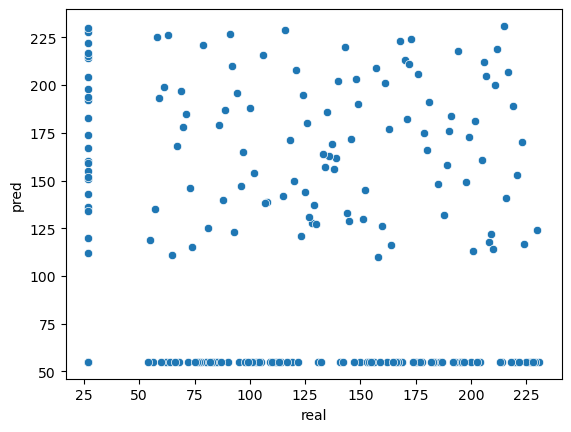

0.11558218607134721


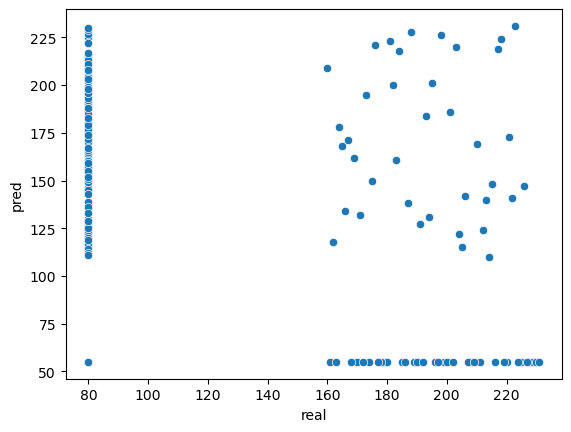

0.11558218607134721


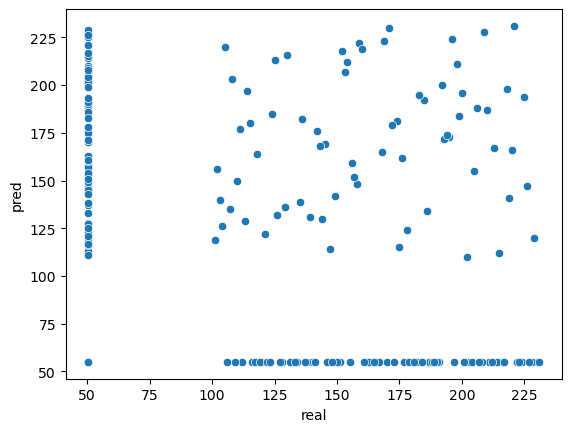

0.11558218607134721


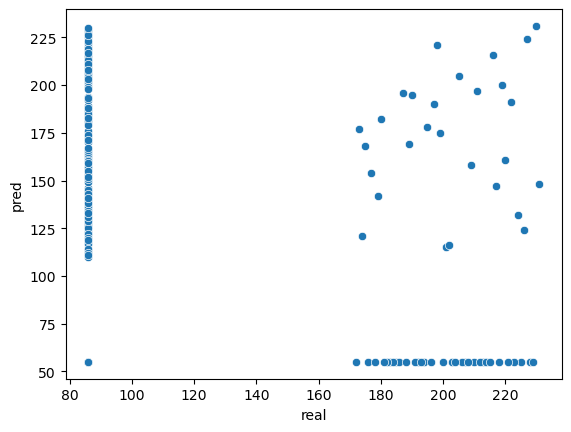

0.11558218607134721


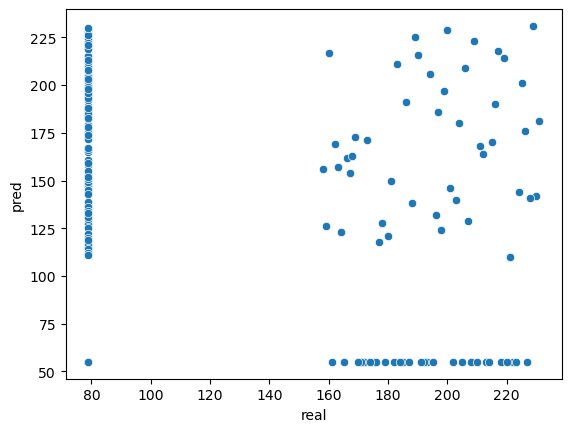

0.11558218607134721


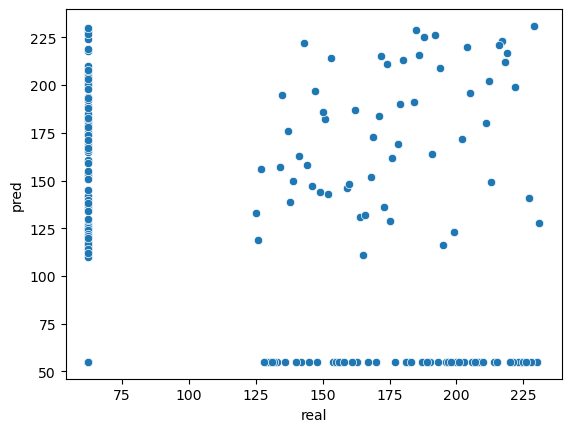

0.11558218607134721


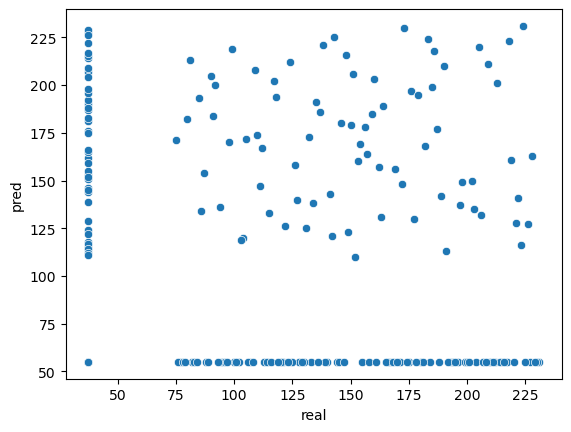

0.11558218607134721


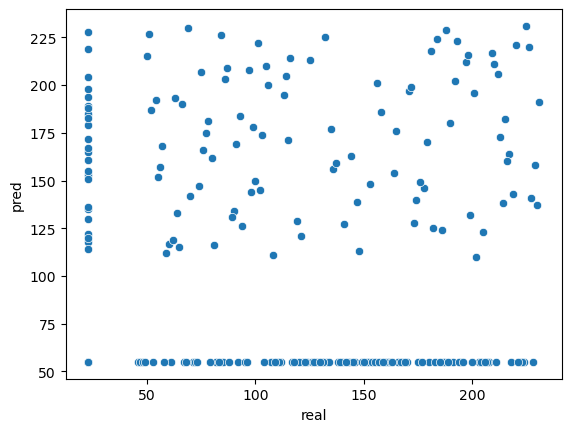

0.11558218607134721


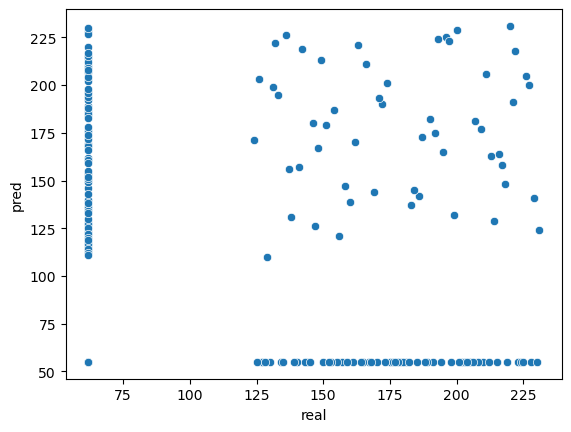

0.11558218607134721


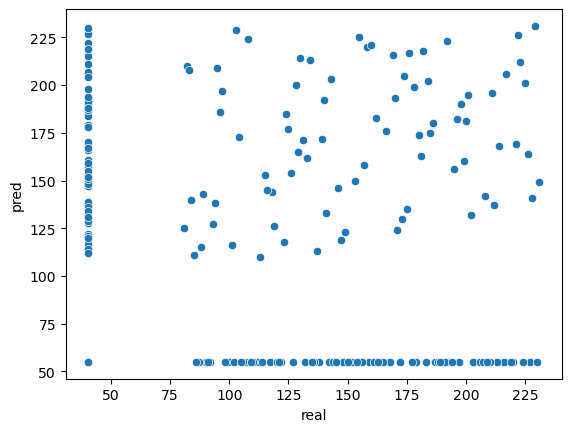

0.11558218607134721


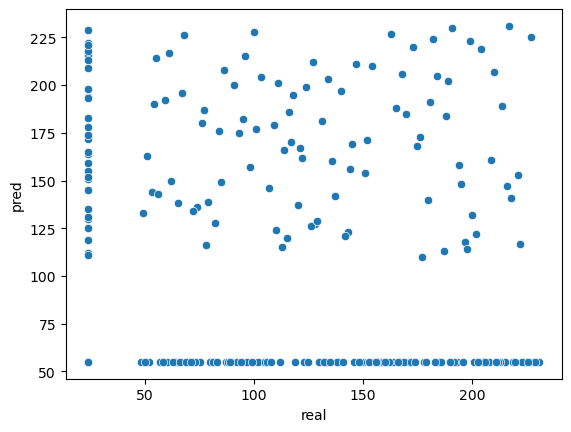

0.11558218607134721


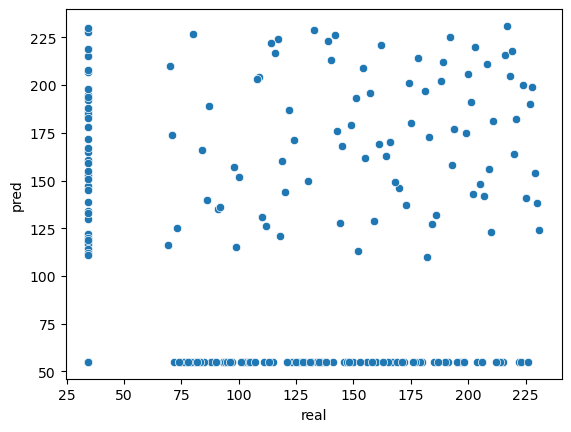

In [206]:
for i in p1overp0_real_site27.columns:
    both = pd.concat([p1overp0_real_site27[i], pred_p1overp0_site27[i]],axis=1)
    both.columns = ['real', 'pred']
    both['real'] =  both['real'].rank()
    both['pred'] = both['pred'].rank()
    #correlation, _ = spearmanr(both['real'], both['pred'])
    print(correlation)
    sns.scatterplot(data = both , x = 'real', y = 'pred')
    plt.show()

0.053207340566882526


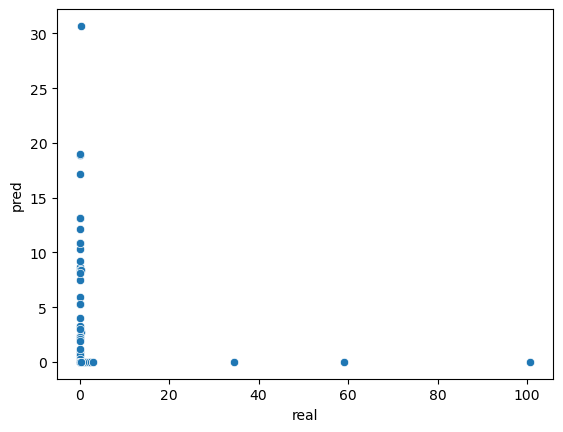

-0.01472720467852013


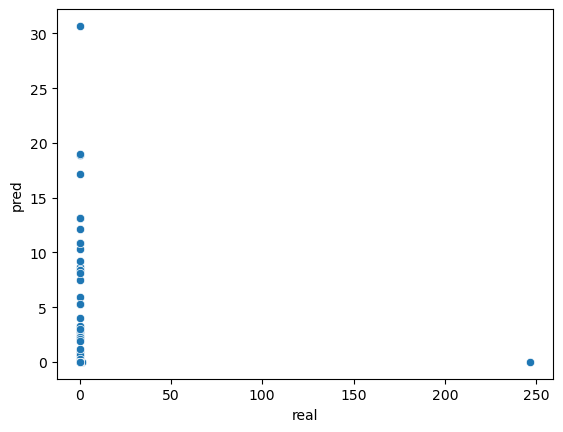

-0.017453918155474948


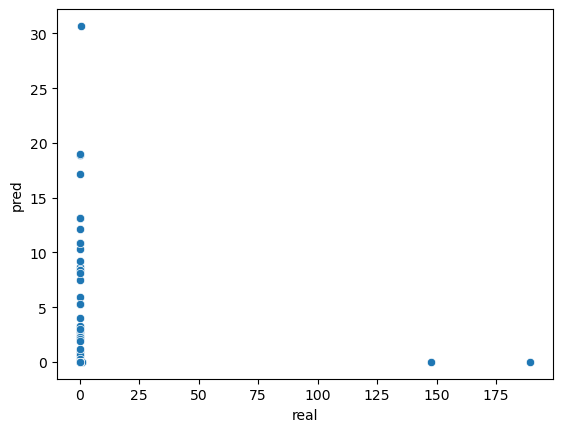

-0.04801451022440447


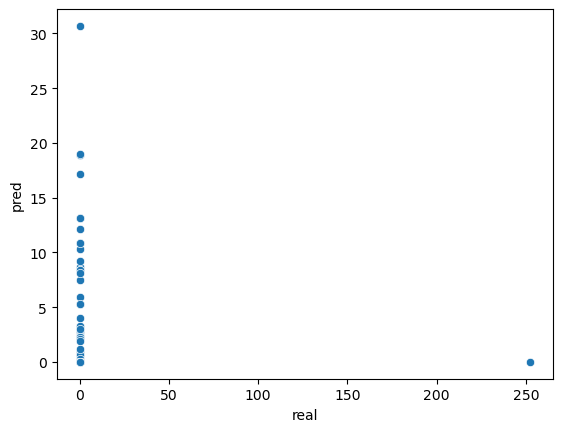

0.12477708702707917


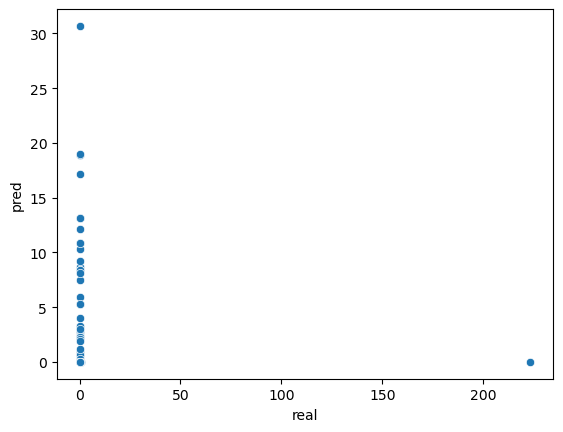

0.05876995731507718


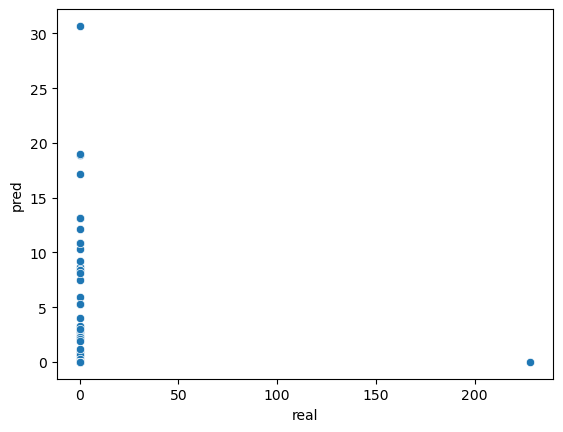

-0.054061485057955286


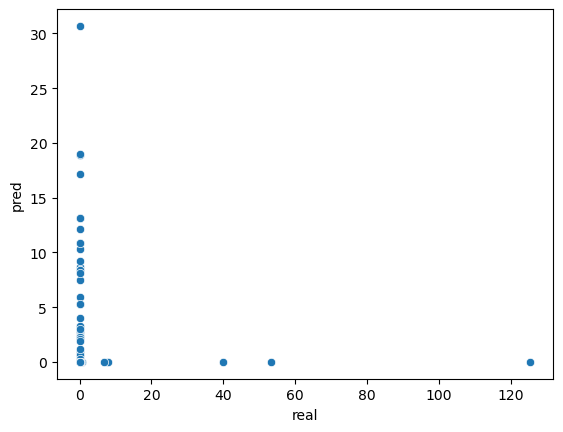

0.009199164043896993


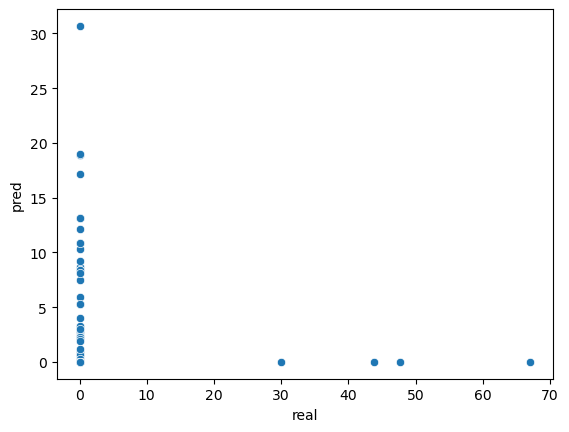

0.0038709662928211068


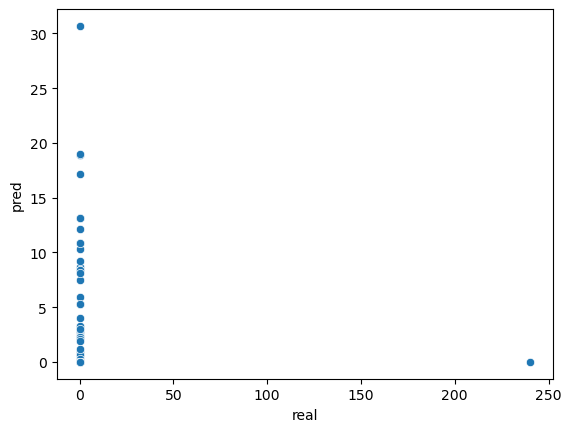

0.04859167778090634


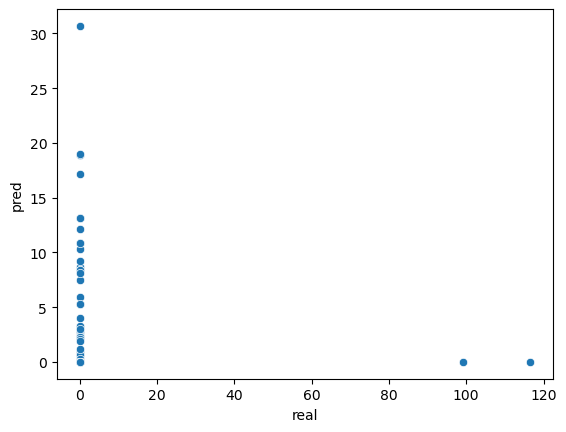

-0.09230397039481988


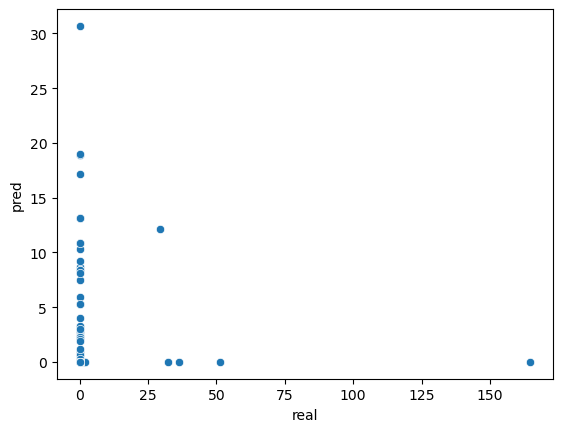

0.11558218607134721


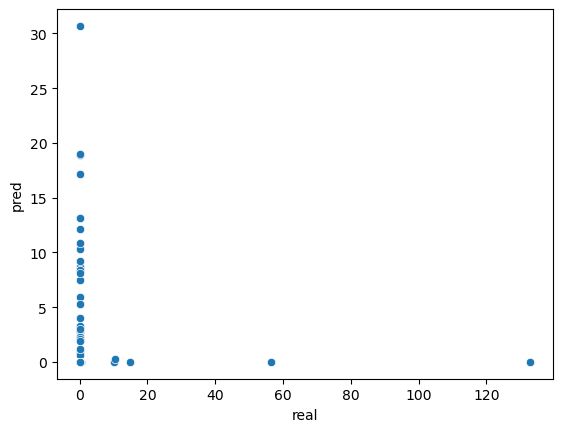

In [192]:
for i in p1overp0_real_site27.columns:
    both = pd.concat([p1overp0_real_site27[i], pred_p1overp0_site27[i]],axis=1)
    both.columns = ['real', 'pred']
    correlation, _ = spearmanr(both['real'], both['pred'])
    print(correlation)
    sns.scatterplot(data = both , x = 'real', y = 'pred')
    plt.show()

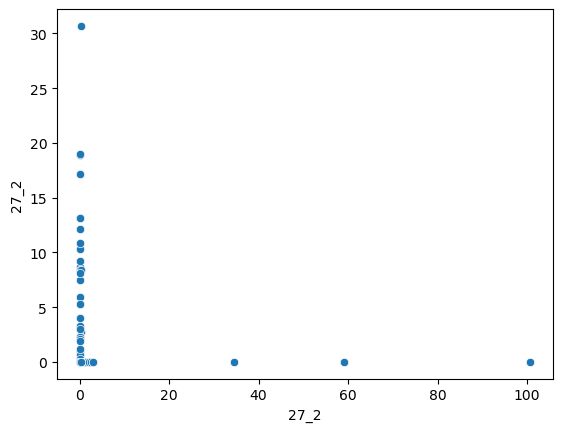

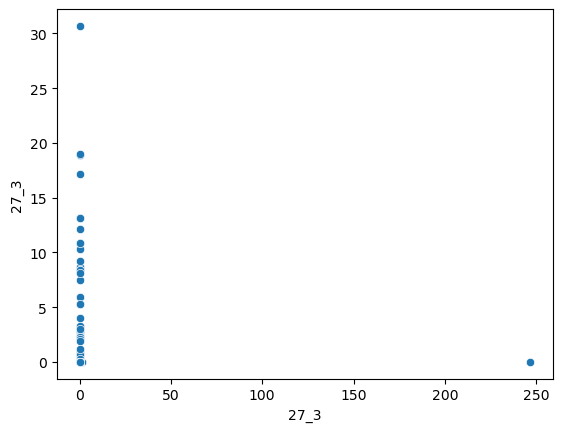

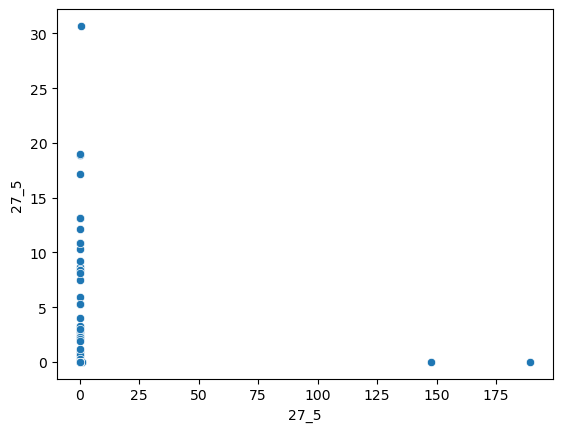

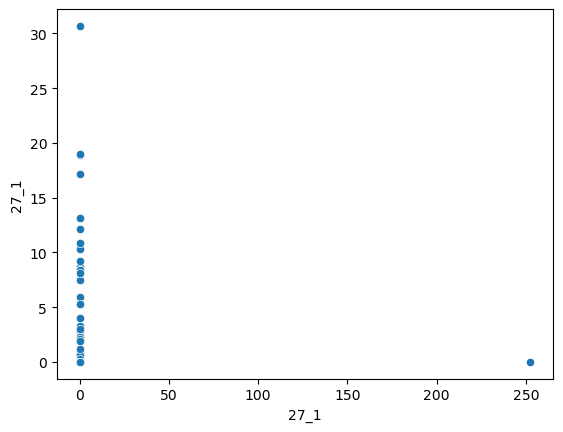

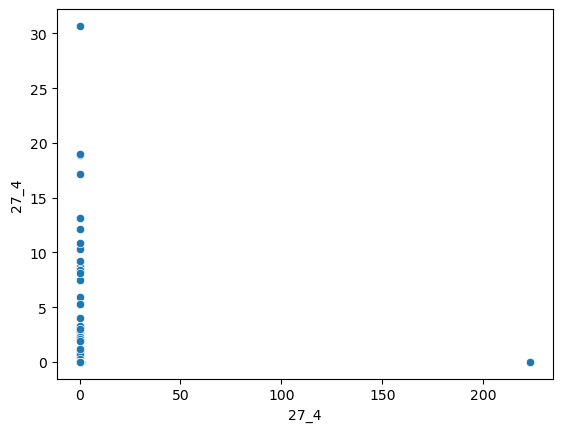

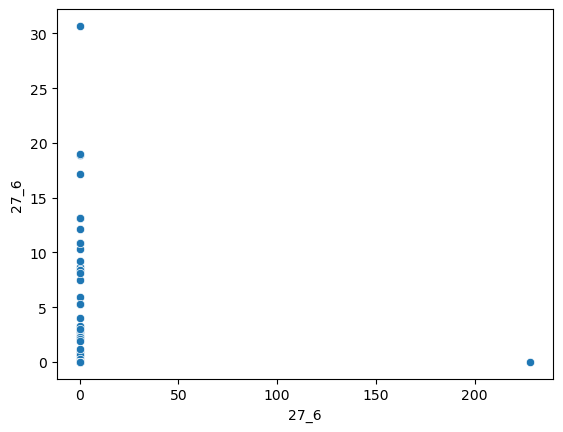

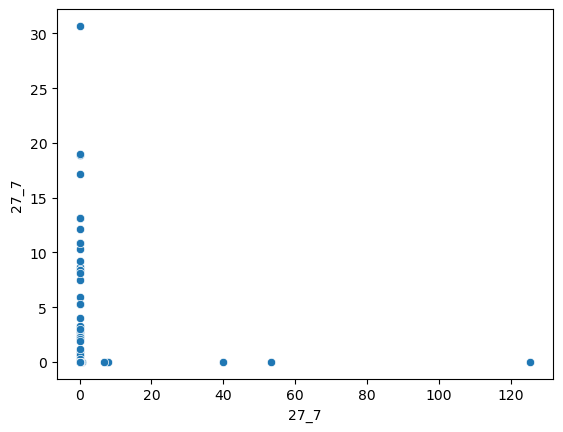

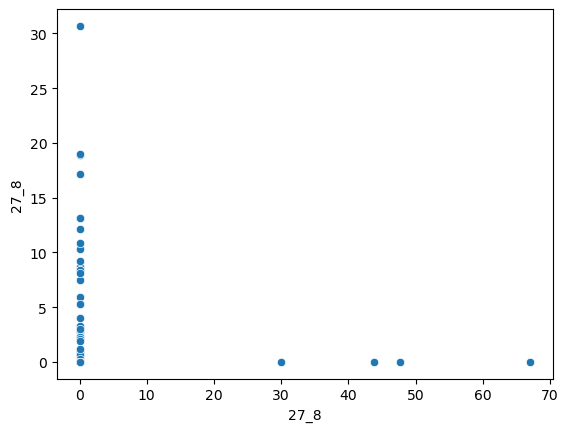

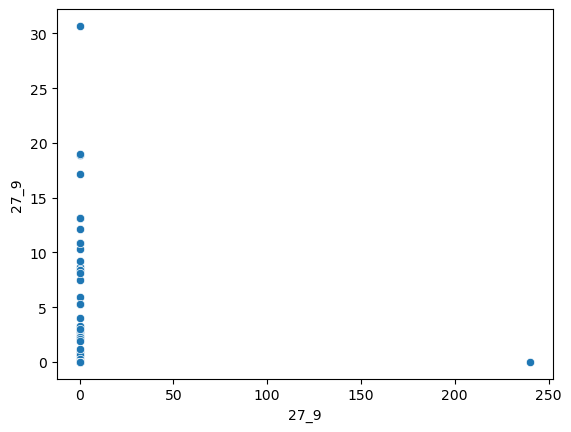

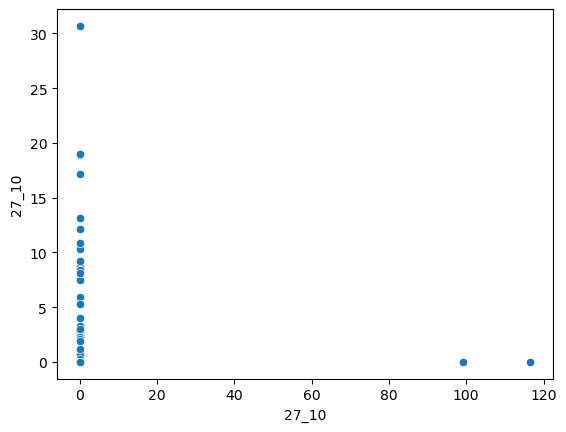

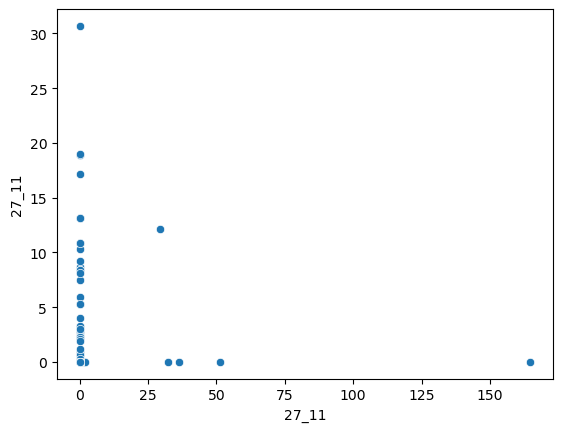

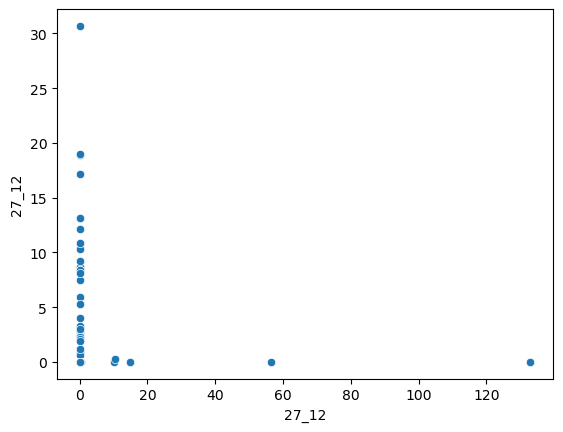

In [186]:
for i in p1overp0_real_site27.columns:
    sns.scatterplot(x = p1overp0_real_site27[i], y = pred_p1overp0_site27[i])
    plt.show()

In [ ]:
for i in deltap_real_site27.columns:
    both = pd.concat([deltap_real_site27[i], pred_deltap_site27[i]],axis=1)
    both.columns = ['real', 'pred']
    correlation, _ = spearmanr(both['real'], both['pred'])
    print(correlation)
    sns.scatterplot(data = both , x = 'real', y = 'pred')
    plt.show()